<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [58]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

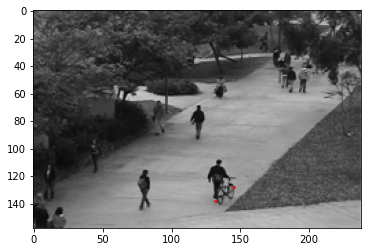

In [59]:
image = cv2.imread('vidf1_33_000_f013.png')
plt.imshow(image)

#bike points
bike_back = np.array([132, 138])
bike_front = np.array([145, 128])
plt.scatter(bike_back[0], bike_back[1], color='r', s=3)
plt.scatter(bike_front[0],bike_front[1], color='r', s=3)

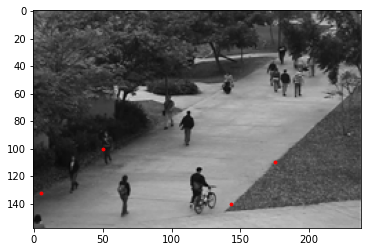

In [131]:
# figure = plt.figure(figsize=(6,6))
image = cv2.imread('vidf1_33_000_f001.png')
plt.imshow(image)
# path boundary
bottom_right = np.array([143, 140])
bottom_left = np.array([5, 132])
top_left = np.array([50, 100])
top_right = np.array([175, 110])

plt.scatter(*bottom_right, color='r', s=8)
plt.scatter(*bottom_left, color='r', s=8)
plt.scatter(*top_left,color='r', s=8)
plt.scatter(*top_right, color='r', s=8)

In [132]:
inches_per_bike = 68
inch_per_meter = 39.37
meters_per_bike = inches_per_bike/inch_per_meter

bike_pixel_length = np.linalg.norm(bike_front - bike_back)
meters_per_pixel = meters_per_bike/bike_pixel_length

print('Meters/Pixel: {:.3f}'.format(meters_per_pixel))

Meters/Pixel: 0.105


In [134]:
# rectangle lengths in pixels
short_side = np.linalg.norm(bottom_right - top_right)
long_side = (np.linalg.norm(bottom_right - bottom_left) +np.linalg.norm(top_right-top_left))/2
print('Short Length: {:.2f}, Long Length: {:.2f}'.format(short_side*meters_per_pixel, long_side * meters_per_pixel))

Short Length: 4.62, Long Length: 13.88


In [135]:
world_bottom_left = np.array([0, short_side*meters_per_pixel])
world_top_left = np.array([0,0])
world_top_right = np.array([long_side*meters_per_pixel, 0])
world_bottom_right = np.array([long_side*meters_per_pixel, short_side*meters_per_pixel])

In [136]:
# Get perspective transform
image_rect = np.float32([bottom_left, top_left, top_right, bottom_right])
world_rect = np.float32([world_bottom_left, world_top_left, world_top_right, world_bottom_right])
matrix_cam2world = cv2.getPerspectiveTransform(image_rect, world_rect)
matrix_cam2world10x = cv2.getPerspectiveTransform(image_rect, world_rect*10)

In [141]:
np.savetxt('ucsd_matrix_cam2world.txt', matrix_cam2world)

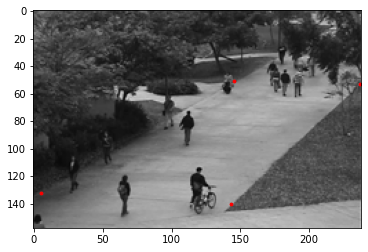

In [138]:
# Calculate ROI
image = cv2.imread('vidf1_33_000_f001.png')
plt.imshow(image)
# path boundary
bottom_right = np.array([143, 140])
bottom_left = np.array([5, 132])
top_left = np.array([145, 51])
top_right = np.array([237, 53])

plt.scatter(*bottom_right, color='r', s=8)
plt.scatter(*bottom_left, color='r', s=8)
plt.scatter(*top_left,color='r', s=8)
plt.scatter(*top_right, color='r', s=8)

In [139]:
image_rect = np.float32([bottom_left, top_left, top_right, bottom_right]).reshape(-1,1,2)
result = cv2.perspectiveTransform(image_rect, matrix_cam2world)

In [140]:
result

array([[[-2.9375327e-15,  4.6192331e+00]],

       [[ 2.7951593e+00, -9.2480974e+00]],

       [[ 1.4036566e+01, -1.0972092e+01]],

       [[ 1.3881421e+01,  4.6192331e+00]]], dtype=float32)